In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as curce_fit
import pandas as pd

def degtorad(deg):
    return(deg/180*np.pi)


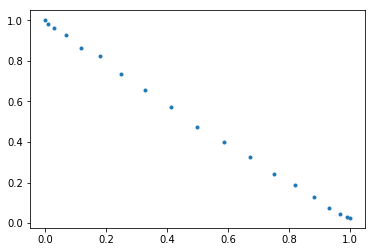

In [2]:
#Als erstes mal die Linearität der Fotodiode Prüfen
data=pd.read_table("Data/Polarisation.txt",skiprows=2)
data

angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
intens=intens/np.max(intens)
fig,ax=plt.subplots()
ax.plot(np.sin(degtorad(angle))**2,intens,".")

In [3]:
def dirac(wavelen,T,E_F):
    E=c.h * c.c / wavelen /c.e
    return 500/ ( np.exp((E-E_F)/8.6e-5 /T) -1 ) # k_B in eV
def diracE(E,T,E_F):
    return 1/ ( np.exp((E-E_F)/c.k/T) -1 ) 

def heavi(x,A,b,c):
    return A * (np.sign(x-b) + c) # A=amp/2 , b=Eg in nm

def expon(x,A,E_g):
    E=c.h * c.c / x /c.e
    return A * np.exp(E/E_g)
def linearfit(linf,x,y,m,b,ymin,ymax):
    """Returns popt,pcov,relevantx,relevanty"""
    tempx=[]
    tempy=[]
    #hier werden die Daten ausgewählt die im richtigen y interval sind
    for i in range(len(y)):
        if(ymin<y[i] and y[i]<ymax):
            tempx.append(x[i])
            tempy.append(y[i])
    popt,pcov=curce_fit(linf,tempx,tempy,p0=(m,b),maxfev=10000)
    return popt,pcov,tempx,tempy
def adjustLambda(lamb,m=0.98,b=23.25):
    return(b+lamb*m)
def wavelen_in_Energy(wavelen):
    wavelen=np.array(wavelen)
    wavelen=wavelen*1e-9
    E=c.h*c.speed_of_light/(wavelen*c.e)
    return(E)

No handles with labels found to put in legend.


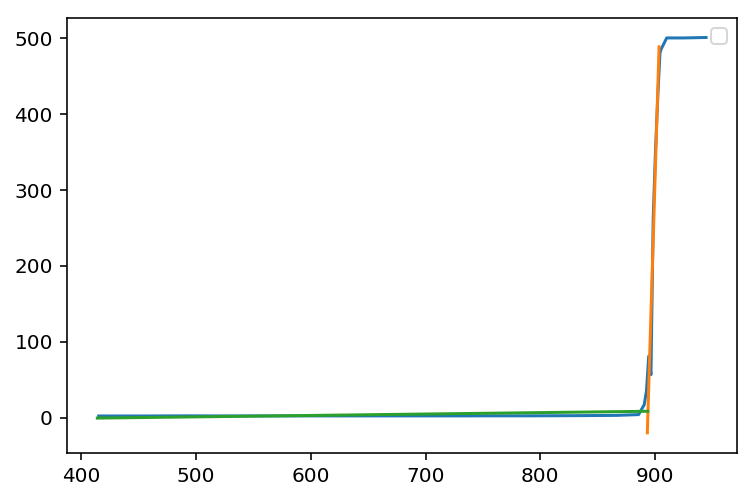

In [4]:

data=[]
data.append( pd.read_csv("Data/{}.txt".format("Links"),delimiter="\t",skiprows=1 ))
wavelen, intens =[],[]
for entry in data:
    wavelen= entry.values[:,0]
    intens = entry.values[:,1]
    

wavelen=np.array(wavelen)

#Als erstes nur die interessanten werte betrachten, also ab 950nm cutten
relwavelen=[]
for x in wavelen:
    if(x<950):
        relwavelen.append(x)
relintens=intens[0:len(relwavelen)]
relwavelen=adjustLambda(np.array(relwavelen))
fig, ax = plt.subplots(dpi=144)

#Data plot
ax.plot(relwavelen,relintens)

#Fit Steigung
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,40,450)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))

#Fit Gerade
#Fit
linf=lambda x,m,b:m*x+b
popt,pcov,tempx,tempy=linearfit(linf,relwavelen,relintens,10,40,0,40)
extension=1.2
mylin=np.linspace(min(tempx)-extension,max(tempx)+extension)
ax.plot(mylin, linf(mylin,*popt))
ax.legend();


In [46]:
def plotXY(ax,filename,skiprows,label):
    data=pd.read_table(filename,skiprows=skiprows)
    angle=np.array(data.values[:,0])
    intens=np.array(data.values[:,1])
     
    ax.plot(angle,intens,label=label)
    ax.semilogy()

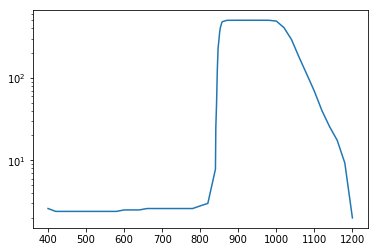

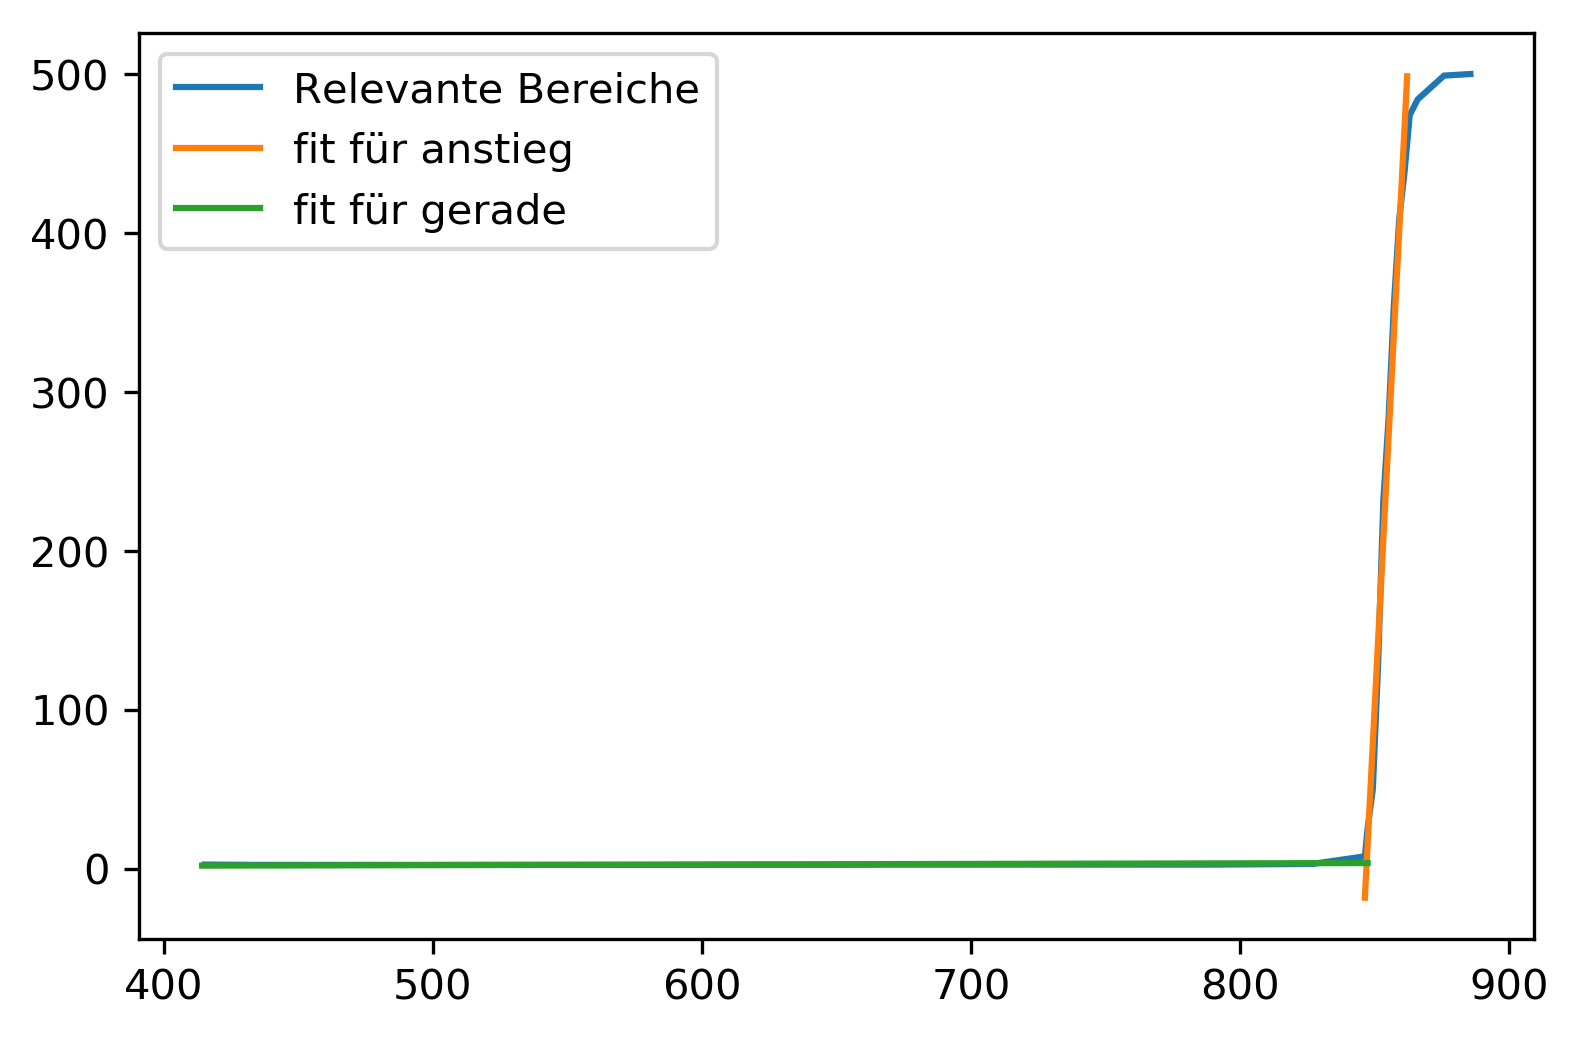

In [47]:
fig,ax=plt.subplots()
plotXY(ax,"Data/LinksN2.txt",2,"Gesamte Links N2")
data=pd.read_table("Data/LinksN2.txt",skiprows=2)
angle=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
#Den hinteren teil abschneiden
fig,ax=plt.subplots(dpi=300)
relangle=[]
for x in angle:
    if(x<900):
        relangle.append(x)
relangle=adjustLambda(np.array(relangle))
relintens=intens[:len(relangle)]
ax.plot(relangle,relintens,label="Relevante Bereiche")
#Fit des Anstiegs
func=lambda x,m,b:m*x+b
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,10,800,20,450)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für anstieg")
#Fit der geraden bis 800nm
popt,pcov,xplot,yplot=linearfit(func,relangle,relintens,0,0,0,20)
mylin=np.linspace(min(xplot)-1,max(xplot)+1,1000)
ax.plot(mylin,func(mylin,*popt),label="fit für gerade")
ax.legend()

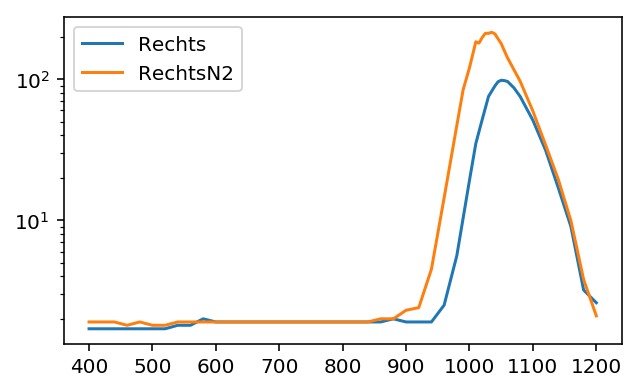

In [48]:
fig,ax=plt.subplots(dpi=144,figsize=(5,3))
plotXY(ax,"Data/Rechts.txt",2,"Rechts")
plotXY(ax,"Data/RechtsN2.txt",2,"RechtsN2")
#plotXY(ax,"Data/Links.txt",2,"Links")
#plotXY(ax,"Data/LinksN2.txt",2,"LinksN2")
#ax.semilogy()
ax.legend()

In [53]:
def indFit(wl,Eg,Ep,A,T=300):
    wl=np.array(wl)
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    #h_nu=wl
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/(c.Boltzmann/c.e) / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/(c.Boltzmann/c.e) / T) ))

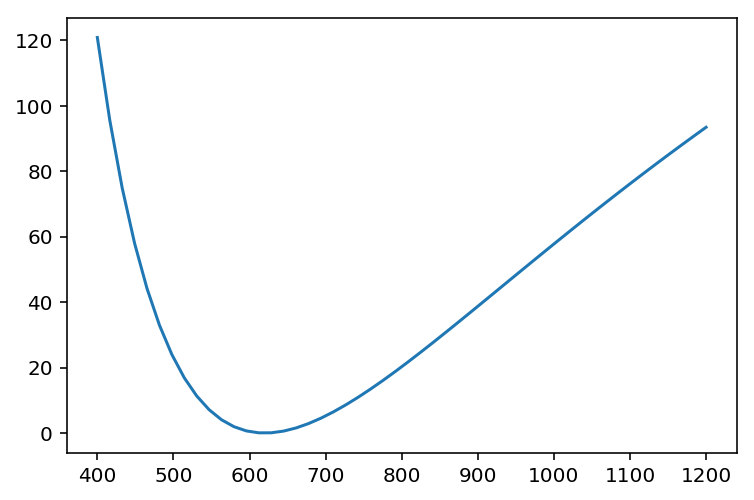

In [54]:
#popt,pcov=cf(ind Fit)

d=np.linspace(400,1200)
fig,ax=plt.subplots(dpi=144)
ax.plot(d,100* indFit(d, 1.7, 0.3,1))
#ax.set(yscale="log")

1 : [ 1.73170622e+04  1.73134369e+04 -1.04508366e-09]
2 : [1.00000003e-10 1.00000000e+09 3.93465649e-09]
3 : [9.99999968e-11 2.00000000e+09 2.71063805e-09]
4 : [1.e-10 3.e+09 1.e+00]
5 : [1.e-10 4.e+09 1.e+00]
6 : [1.e-10 5.e+09 1.e+00]
7 : [1.e-10 6.e+09 1.e+00]
8 : [1.e-10 7.e+09 1.e+00]
9 : [1.e-10 8.e+09 1.e+00]
10 : [1.00000006e-10 9.00000000e+09 2.39491438e-09]
11 : [ 1.00000002e-10  1.00000000e+10 -1.70455161e-09]
12 : [1.00000000e+09 3.16227766e+04 1.84917637e-09]
13 : [1.0000000e+09 1.0000000e+09 2.7106376e-09]
14 : [1.00000000e+09 2.00000000e+09 3.93757249e-10]
15 : [1.00000000e+09 3.00000000e+09 2.09862872e-09]
16 : [ 1.00000000e+09  4.00000000e+09 -1.45974721e-09]
17 : [ 1.00000000e+09  5.00000000e+09 -1.42492684e-11]
18 : [1.00000000e+09 6.00000000e+09 2.88816693e-09]
19 : [1.00000000e+09 7.00000000e+09 1.79262316e-09]
20 : [1.00000000e+09 8.00000000e+09 2.39491393e-09]
21 : [ 1.00000000e+09  9.00000000e+09 -1.70455161e-09]
22 : [1.00000000e+09 1.00000000e+10 9.99255789e-1

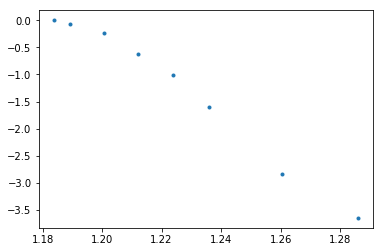

In [ ]:
data=pd.read_table("Data/Rechts.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)
#temp=len(intens)
xmin=28
intens=intens[xmin:temp]
intens=intens/np.max(intens)

#hier bin ich mir nicht sicher
intens=np.log(intens)

wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots()
ax.plot(energy,intens,".")
fig,ax=plt.subplots(nrows=12,ncols=12,figsize=(50,50))
ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-10,1e10,11)
Ef=Eg
counter=0
xcounter=0
ycounter=0
xaxis=np.linspace(min(energy),max(energy))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            counter=counter+1
            popt,pcov=curce_fit(indFit,wavelen,intens,p0=(x,y,1),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]) )
            #if(popt[0]>popt[1]):
            print(counter,":",popt)
            ycounter=ycounter+1
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(energy,intens,".")
            ax[xcounter,ycounter].set_title(counter)
        except RuntimeError:
            print("nothing")

In [30]:
def indFit(wl,Eg,Ep,A,T=77):
    wl=wl*1e-9
    h_nu= c.h*c.c /wl /c.e
    return A *((h_nu - Eg + Ep)**2/ ( np.exp(Ep/(c.Boltzmann/c.e) / T) -1) + (h_nu - Eg - Ep)**2/ ( 1- np.exp(-Ep/(c.Boltzmann/c.e) / T) ))

1 : [ 3.66487361e-02  7.02893043e-03 -5.87565069e-07]
2 : [ 1.62181159e-02  6.24531010e-03 -5.31306180e-07]
3 : [ 1.43640007e-02  5.16090844e-03 -4.48600588e-07]
4 : [ 4.07970994e-02  3.89788501e-03 -3.45872170e-07]
5 : [ 1.61978486e-02  3.95478784e-03 -3.50626652e-07]
6 : [ 1.72230817e-02  3.86389415e-03 -3.43011757e-07]
7 : [ 2.88975173e+02  7.59792753e+02 -3.19192728e-04]
8 : [ 4.62870126e+02  5.85897734e+02 -3.19193139e-04]
9 : [ 2.32888078e-02  3.68088105e-03 -3.27596254e-07]
10 : [ 5.10622812e+02  5.38145203e+02 -3.19192176e-04]
11 : [ 1.38118032e-11  3.58571686e-04 -3.27120617e-08]
12 : [ 2.92555751e-02  3.84876307e-03 -3.41747602e-07]
13 : [ 2.86362478e-02  3.87764660e-03 -3.44170843e-07]
14 : [ 5.85604540e+02  4.63163167e+02 -3.19194092e-04]
15 : [ 4.85403775e+02  5.63363915e+02 -3.19194192e-04]
16 : [ 2.18900322e-02  3.52899721e-03 -3.14711704e-07]
17 : [ 2.72307880e-02  3.77319844e-03 -3.35388394e-07]
18 : [ 3.81967612e+02  6.66800314e+02 -3.19192728e-04]
19 : [ 5.06820743e+

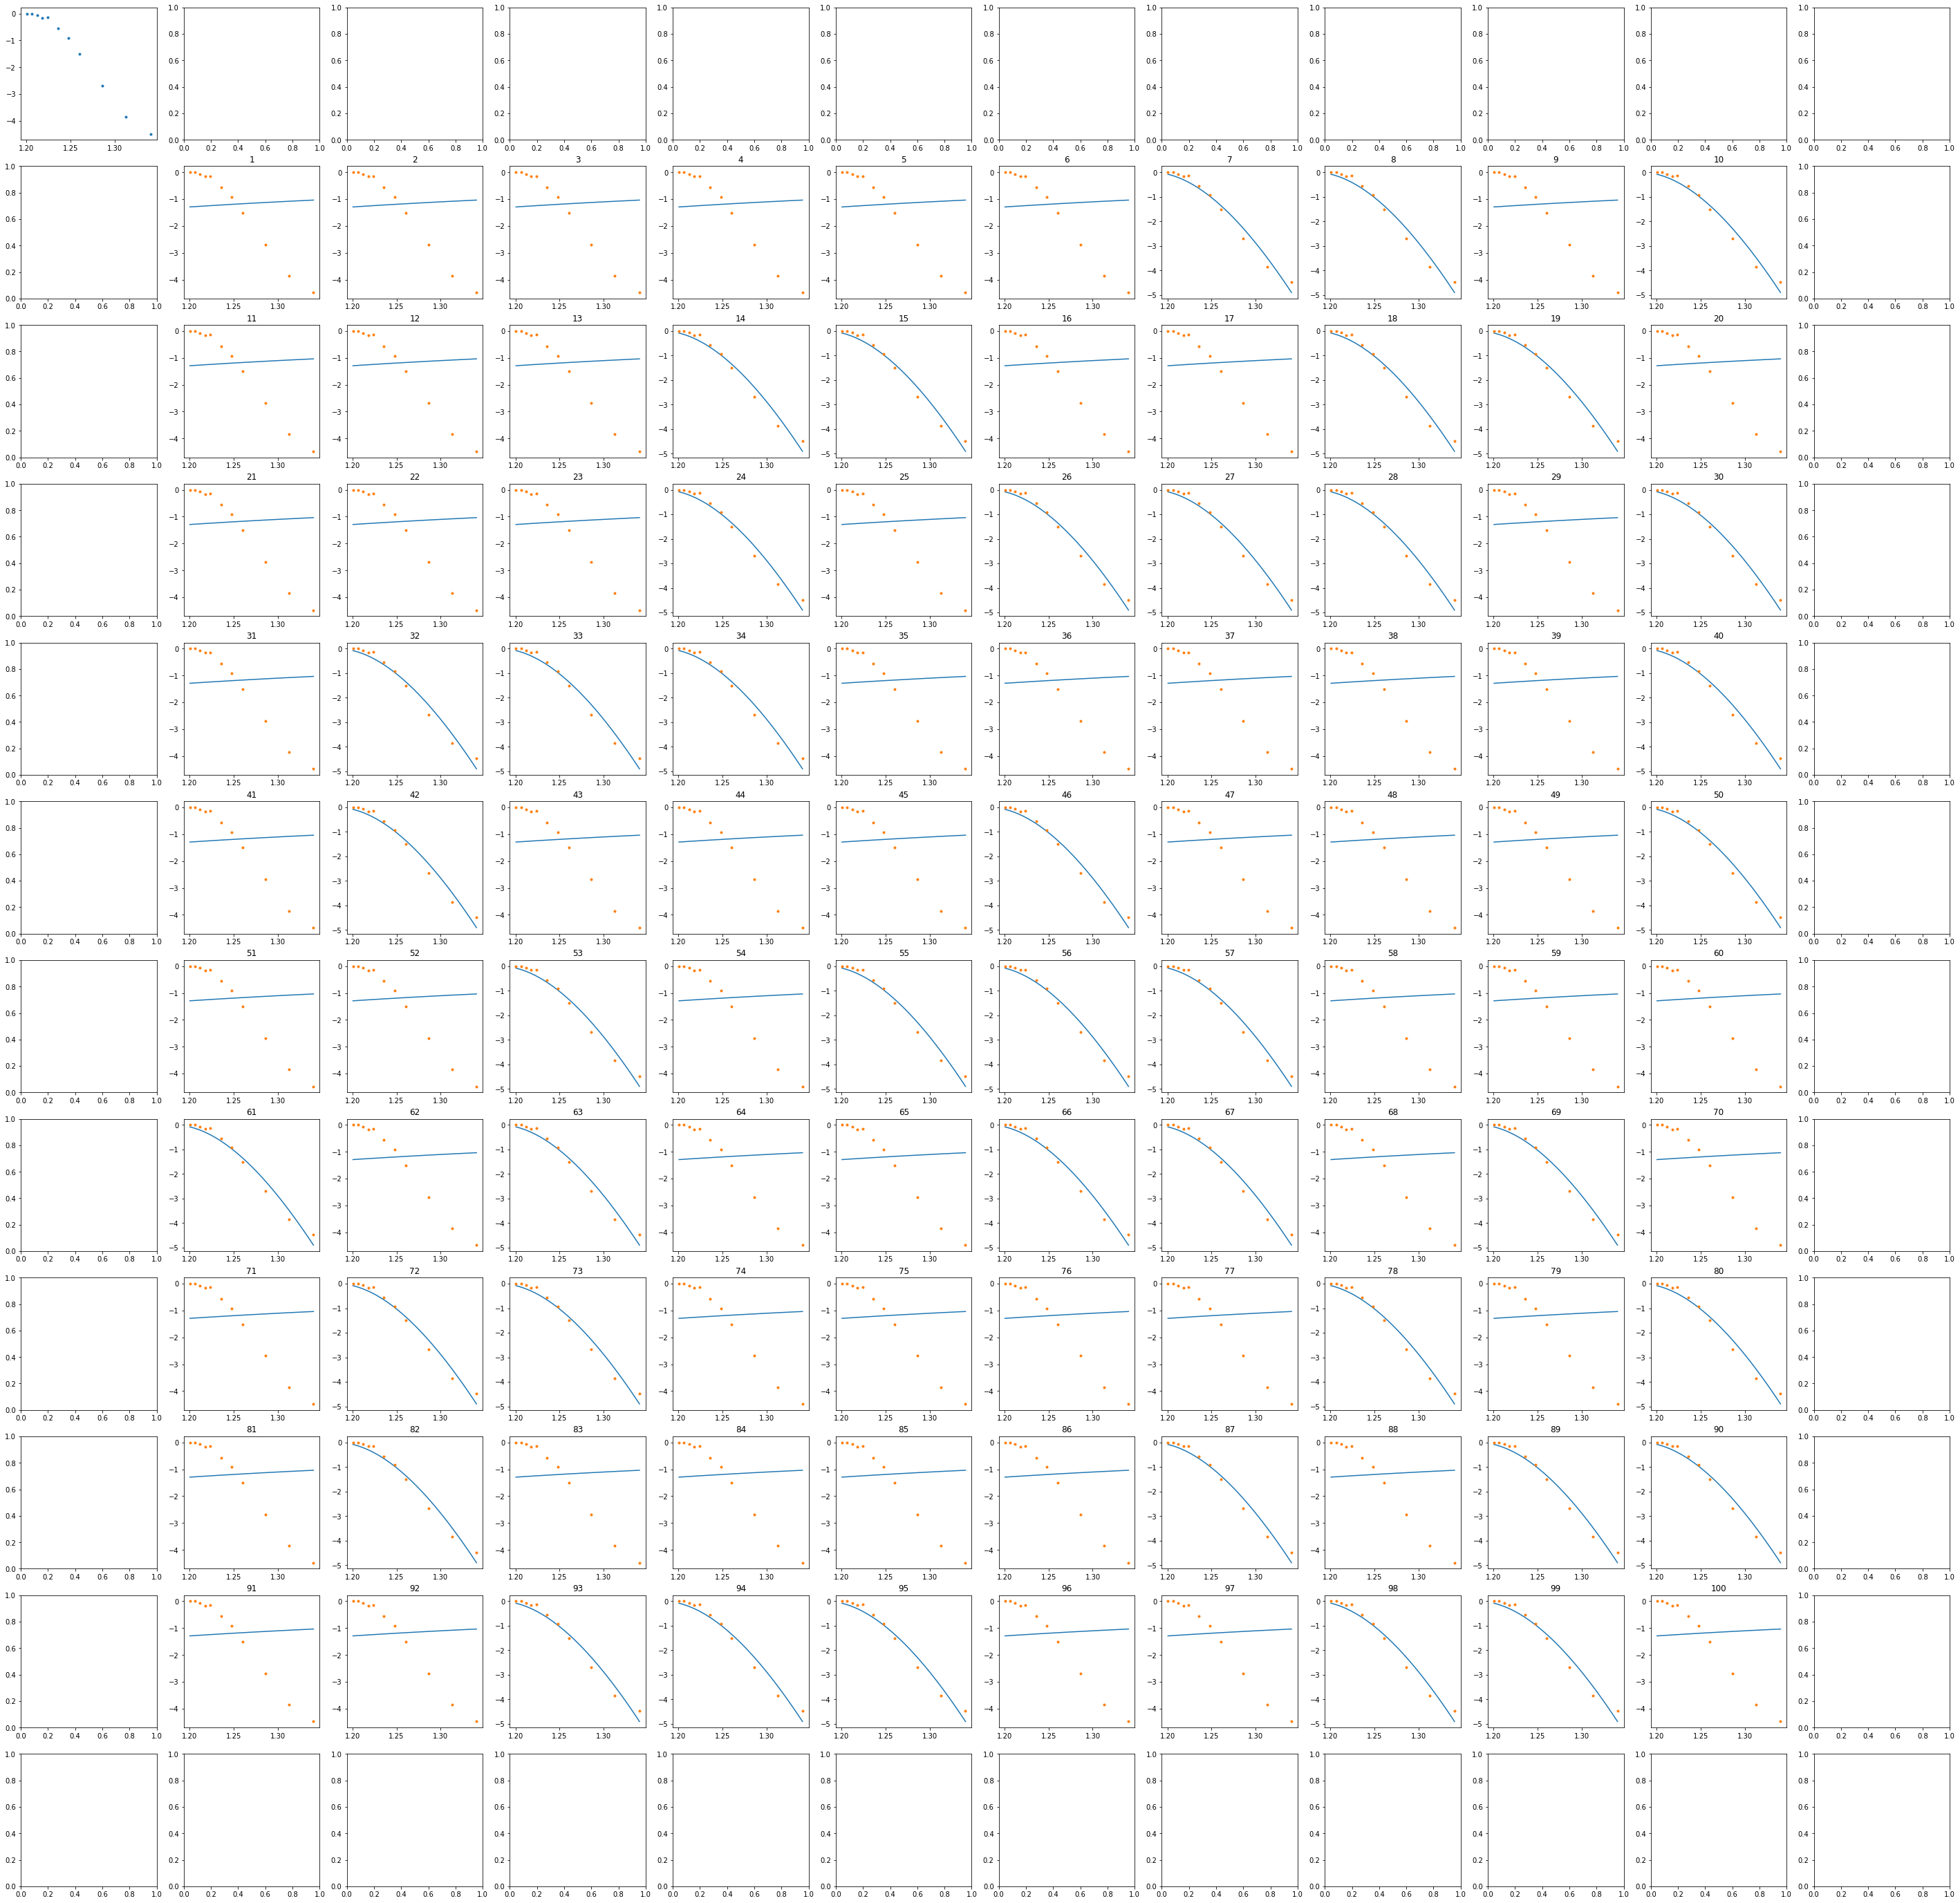

In [31]:
data=pd.read_table("Data/RechtsN2.txt",skiprows=2)
wavelen=np.array(data.values[:,0])
intens=np.array(data.values[:,1])
wavelen=adjustLambda(wavelen)
temp=np.argmax(intens)
xmin=26
intens=intens[xmin:temp]
intens=intens/np.max(intens)
intens=np.log(intens)
wavelen=wavelen[xmin:temp]
energy=wavelen_in_Energy(wavelen)
fig,ax=plt.subplots(nrows=12,ncols=12,figsize=(50,50))
ax[0,0].plot(energy,intens,".")
Eg=np.linspace(1e-2,1e2,10)
Ef=Eg
counter=0
xcounter=0
ycounter=0
poptsum=[]
xaxis=np.linspace(min(energy),max(energy))
for x in Eg:
    xcounter=xcounter+1
    ycounter=0
    for y in Ef:
        try:
            
            popt,pcov=curce_fit(indFit,energy,intens,p0=(x,y,1),maxfev=10000,bounds=([0,0,-np.inf],[np.inf,np.inf,np.inf]))
            poptsum.append(popt)
            counter=counter+1
            print(counter,":",popt)
            ycounter=ycounter+1
            ax[xcounter,ycounter].plot(xaxis,indFit(xaxis,*popt))
            ax[xcounter,ycounter].plot(energy,intens,".")
            ax[xcounter,ycounter].set_title(counter)
        except RuntimeError:
            print("nothing")

In [19]:
poptsum=np.array(poptsum)
Eg=np.sum(poptsum[:,0])/counter
Eg

441.34215311053265

In [13]:
c.Boltzmann/c.e

8.617330337217213e-05